 #### Dataset


    PHY 
        Coordinate points x
        u  

#### Packages 

In [233]:
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


In [216]:
k = 0.5
c = 1
x = 0
t = 1
print(np.sin(k*np.pi/2*(t - x/c)) + k*np.pi/2*(t - x/c))

1.4925049445839957


In [234]:
def calculate_phi(k: float) -> float:
  """
  Converts a k parameter within the range [0.5, 2] to a phi parameter
  in the range [0, 2π] through a linear correspondence.

  Args:
    k: A float between 0.5 and 2.0.

  Returns:
    The corresponding phi value as a float between 0 and 2π.

  Raises:
    ValueError: If the input k is outside the specified range [0.5, 2].
  """
  if not (0.5 <= k <= 2):
    raise ValueError("Input k must be within the range [0.5, 2].")

  # Normalize k from [0.5, 2] to [0, 1]
  normalized_k = (k - 0.5) / (2 - 0.5)

  # Scale the normalized value to the [0, 2π] range
  phi = normalized_k * 2 * np.pi

  return phi

def f_ic(x,k,phi):
    return np.sin(k*np.pi * x + phi) - np.sin(phi)# from initial condition line

def g_bc(t, k):
    return np.sin(k*np.pi * t)  # from inflow boundary condition

def u_close_form(x, t, c, k, phi):
    return np.where(x >= c*t,
                    f_ic(x - c*t,k, phi),   # from initial condition line
                    g_bc(t - x/c,k))  # from inflow boundary condition

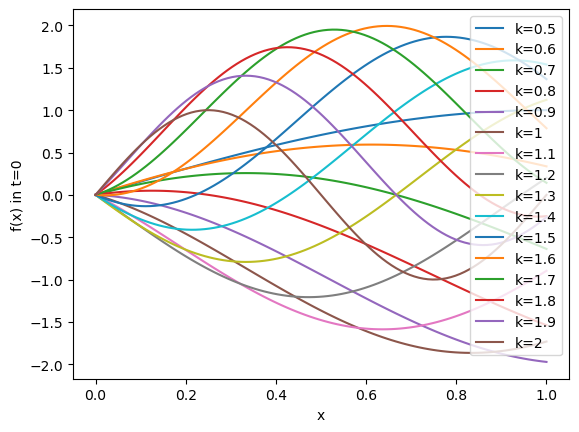

In [236]:
# IC
k_list = [0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]
k = np.array(k_list)[None, :]
t = 0 # position of the boundary
c = 1
x = np.linspace(0,1,100)[:,None]
fig,ax = plt.subplots()
for idx,k_i in enumerate(k_list):
    phi_i = calculate_phi(k_i)
    f =  f_ic(x - c*t, k_i, phi_i)
    ax.plot(x,f,label=f'k={k_i}')
    # ax.plot(x,f[:,idx],label=f'k={k_i}')
ax.set_xlabel('x')
ax.set_ylabel('f(x) in t=0')
ax.legend()
plt.show()

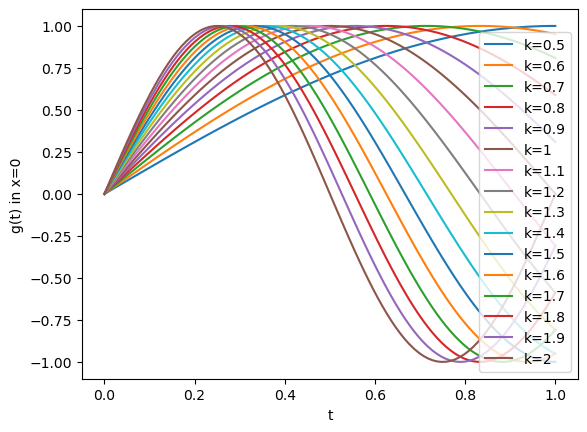

In [237]:
# BC
k_list = [0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]
k = np.array(k_list)[None, :]
x = 0 # position of the boundary
c = 1
t = np.linspace(0,1,100)[:,None]
g =  g_bc(t - x/c, k)
fig,ax = plt.subplots()
for idx,i in enumerate(k_list):
    ax.plot(t,g[:,idx],label=f'k={i}')
ax.set_xlabel('t')
ax.set_ylabel('g(t) in x=0')
ax.legend()
plt.show()
# - 2*np.cos(k*np.pi/2*(t - x/c))

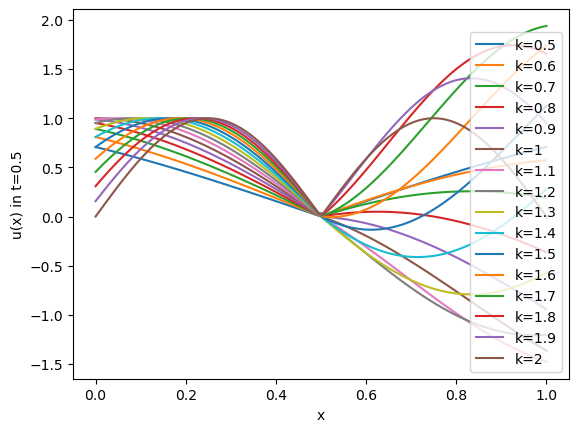

In [239]:
# Closed form solution
k_list = [0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]
# k = np.array(k_list)[None, :]
t = 0.5
c = 1
x = np.linspace(0,1,100)[:,None]
fig,ax = plt.subplots()
for idx,k_i in enumerate(k_list):
    phi_i = calculate_phi(k_i)
    u =  u_close_form(x, t, c, k_i, phi_i)
    ax.plot(x,u,label=f'k={k_i}')
    # ax.plot(x,u[:,idx],label=f'k={k_i}')
ax.set_xlabel('x')
ax.set_ylabel(f'u(x) in t={t}')
ax.legend()
plt.show()


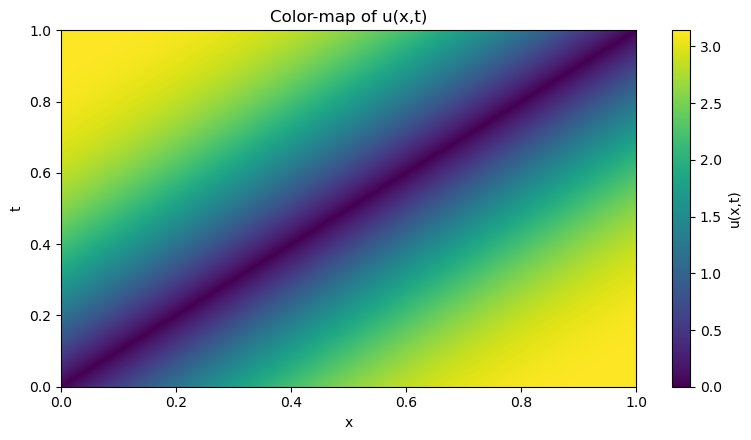

In [226]:
# Parameters for the closed-form solution 
c = 1       # advection speed
k = 2
# Computational grid
x_min, x_max, nx = 0.0, 1.0, 400   # x ∈ [x_min, x_max] with nx points
t_min, t_max, nt = 0.0, 1.0, 200    # t ∈ [t_min, t_max] with nt points

x = np.linspace(x_min, x_max, nx)
t = np.linspace(t_min, t_max, nt)
X, T = np.meshgrid(x, t)            # shape (nt, nx)

# Closed-form solution on the grid
U = u_close_form(X, T, c, k)

# Plot: x on horizontal axis, t on vertical axis, color encodes u(x,t)
plt.figure(figsize=(8, 4.5))
plt.imshow(
    U,
    extent=[x_min, x_max, t_min, t_max],
    aspect="auto",
    origin="lower"  # makes t = 0 at the bottom
)
plt.colorbar(label="u(x,t)")
plt.title("Color-map of u(x,t)")
plt.xlabel("x")
plt.ylabel("t")
plt.tight_layout()
plt.show()

## Importing files

In [2]:
ID = 'C05'
N_time_step = 51

## (1) PHY

In [3]:
stratum_path = f'../.dataset/STRATA_{ID}/PHY/'

# Get a list of files
files = os.listdir(stratum_path)

for filename in files:
    data0 = np.loadtxt(stratum_path + filename, skiprows=1)

    dims1 = (data0.shape[0],1,N_time_step)

    break

coordinates = np.zeros((dims1))
u = np.zeros((dims1))

files.sort()
i = 0
# Wrap the loop with tqdm for a progress bar
for filename in tqdm(files, desc="Processing Files "):
    data = np.loadtxt(stratum_path + filename, skiprows=1)
    
    coordinates[:,:,i] = data[:,1:2]
    
    u[:,:,i] = data[:,2:3]

    i+=1


print('(1.1) Coordinates points', coordinates.shape)
print('(1.2) Velocity', u.shape)
# 

Processing Files : 100%|██████████| 51/51 [00:00<00:00, 264.35it/s]

(1.1) Coordinates points (10000, 1, 51)
(1.2) Velocity (10000, 1, 51)


### VISUALIZATION 

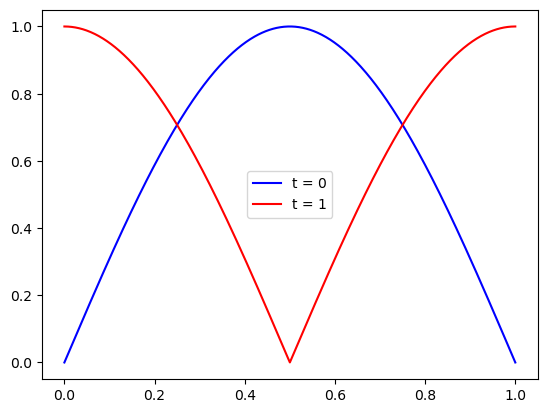

In [4]:
figure, axis = plt.subplots()

axis.plot(coordinates[:,:,0], u[:,:,0],'-b', label=f"t = 0")
axis.plot(coordinates[:,:,-1], u[:,:,-1],'-r', label=f"t = 1")
axis.legend()

In [5]:
def u_close_form(x, t, c):
    return np.where(x >= c*t,
                    np.sin(np.pi * (x - c*t)),   # from initial line
                    np.sin(np.pi/2 * (t - x/c)))   # from inflow boundary

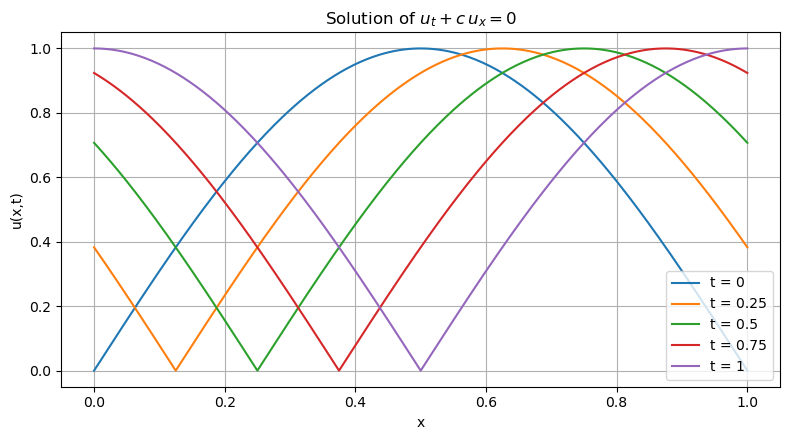

In [6]:
# --- parameters ---------------------------------------------------------
c = 0.5            # advection speed
t_values = [0.0, 0.25, 0.5, 0.75, 1.0]   # times at which to plot

# --- spatial grid -------------------------------------------------------
x_min, x_max = 0, 1
x = np.linspace(x_min, x_max, 401)

# --- plot ---------------------------------------------------------------
plt.figure(figsize=(8, 4.5))
for t in t_values:
    u = u_close_form(x, t, c)
    plt.plot(x, u, label=f"t = {t:g}")

plt.title(r"Solution of $u_t + c\,u_x = 0$")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

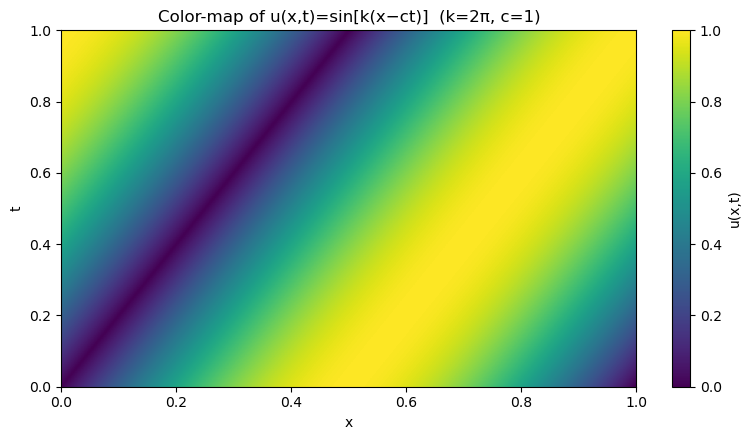

In [7]:
# Parameters for the closed-form solution 
c = 0.5         # advection speed

# Computational grid
x_min, x_max, nx = 0.0, 1.0, 400   # x ∈ [x_min, x_max] with nx points
t_min, t_max, nt = 0.0, 1.0, 200    # t ∈ [t_min, t_max] with nt points

x = np.linspace(x_min, x_max, nx)
t = np.linspace(t_min, t_max, nt)
X, T = np.meshgrid(x, t)            # shape (nt, nx)

# Closed-form solution on the grid
U = u_close_form(X, T, c)

# Plot: x on horizontal axis, t on vertical axis, color encodes u(x,t)
plt.figure(figsize=(8, 4.5))
plt.imshow(
    U,
    extent=[x_min, x_max, t_min, t_max],
    aspect="auto",
    origin="lower"  # makes t = 0 at the bottom
)
plt.colorbar(label="u(x,t)")
plt.title("Color-map of u(x,t)=sin[k(x−ct)]  (k=2π, c=1)")
plt.xlabel("x")
plt.ylabel("t")
plt.tight_layout()
plt.show()
